In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer=Tokenizer()

In [4]:
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.5MB/s]


In [5]:
data=open('/content/sonnets.txt').read()
corpus=data.lower().split('\n')

In [6]:
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

In [7]:
input_sequences=[]
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words//2,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [9]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 21s 25ms/step - loss: 6.9092 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 12s 25ms/step - loss: 6.4958 - accuracy: 0.0210
Epoch 3/100
484/484 [==============================] - 12s 25ms/step - loss: 6.3998 - accuracy: 0.0242
Epoch 4/100
484/484 [==============================] - 12s 25ms/step - loss: 6.2792 - accuracy: 0.0281
Epoch 5/100
484/484 [==============================] - 12s 24ms/step - loss: 6.1793 - accuracy: 0.0345
Epoch 6/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0976 - accuracy: 0.0391
Epoch 7/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0212 - accuracy: 0.0422
Epoch 8/100
484/484 [==============================] - 12s 24ms/step - loss: 5.9430 - accuracy: 0.0442
Epoch 9/100
484/484 [==============================] - 11s 24ms/step - loss: 5.8520 - accuracy: 0.0498
Epoch 10/100
484/484 [==============================] - 12s 24ms/step - l

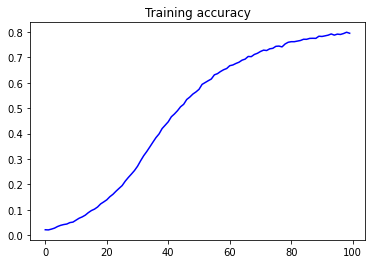

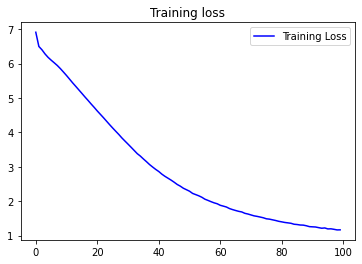

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted =np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy thoughts shall prove decay lie away behind true sight ' seen seen bow another moan away age and dost hence go beaten ground state there skill hence achieve hence none none he's adieu plot flowers quite nought thence skill aside tend did date about torn new sit dote as his side give store lived up cherish back up find ears out of seeming thine wrong inhearse bow dote back a dream must give another minds me on mind single ill ' ' stole out up repair meet from thee all his devil hate state leaves ' defeated gladly happy
